In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns

In [5]:
df = pd.read_csv("cleaned-data.csv")

In [6]:
df = df.drop(['DataType','Description','PetID','Name'], axis = 1)

In [ ]:
# Correlation among variables
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(corr)] = False
sns.heatmap(data=corr,mask=mask,annot=True,linewidths=.5,square=True)
fig = plt.gcf()
fig.set_size_inches(90, 20)
plt.title('correlation.png', fontsize=20)
#plt.savefig("fig_result.png", bbox_inches="tight", dpi=100)
plt.show() 

## Adoption speed
1. 0 - Pet was adopted on the same day as it was listed.
2. 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
3. 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
4. 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
5. 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

Tableau: Adoption Speed(dashboard)

Analysis:

We can see that some pets were adopted immediately, but these are rare cases: maybe someone wanted to adopt any pet, or the pet was lucky to be seen by person, who wanted a similar pet. A lot of pets aren't adopted at all

Type analysis; i.e. dog/ cat -- use filter

## Age

tableau: Age(dashboard)

We can see that most pets are young - maybe after the birth. Also there a lot of pets with an age equal to multiples of 12 - I think than owners didn't bother with the exact age.

plotly plot

We can see that young pets are adopted quite fast and most of them are adopted; Most pets are less than 4 months old with a huge spike at 2 months; It seems that a lot of people don't input exact age and write age in years (or multiples of 12); It could make sense to create some binary variables based on age;

In [7]:
#Adoption Speed vs Age plot
data_age = []
for i in range(5):
    datax = df.loc[df['AdoptionSpeed'] == 2]
    data = df.loc[df['AdoptionSpeed'] == i]
    data_age.append(go.Scatter(
        x = datax['Age'].value_counts().sort_index().index,
        y = data['Age'].value_counts().sort_index().values,
        mode = str(i),
        name = str(i)))
    

layout = dict(title = 'Adoption Speed vs Age',
              yaxis = dict(title = 'Count', zeroline = False),
              xaxis = dict(title = 'Age in months', zeroline = False))

fig = dict(data=data_age, layout = layout)
py.iplot(fig, filename = 'basic-line')

## Breed
Tableau: Breed(dashboard)

Analysis:

It seems that male pets are adopted faster than female. Having no information about the gender really decreases chances.

## Color
Tableau: Color(dashboard)

We can see that most common colors are black and brown. Interesting to notice that there are almost no gray or yellow dogs :)

In [10]:
df[['Gender']] = df[['Gender']].replace(['Male','Female','Neutered/Sprayed'],[1,2,3])
df['Color'] = (df['Color1'] + '/' + df['Color2'] + '/' + df['Color3']).replace(['//'], [' '])
gender = {1:'Male', 2:'Female', 3:'Sprayed/Neutered'}
for i in df['Type'].unique():
    for h in df['Gender'].unique():
        data_color = df.loc[(df['Type'] == i) & (df['Gender'] == h)]
        top_colors = list(data_color['Color'].value_counts().index)[:5]
        h = gender[h]
        print(f"Most popular colors of {h} {i}s: {' '.join(top_colors)}")

Most popular colors of Male Dogs: Brown/none/none Black/Brown/none Black/none/none Brown/White/none Black/White/none
Most popular colors of Female Dogs: Brown/none/none Black/Brown/none Brown/White/none Black/none/none Black/White/none
Most popular colors of Sprayed/Neutered Dogs: Black/Brown/White Black/Brown/none Black/Brown/Cream Brown/none/none Black/White/none
Most popular colors of Male Cats: Black/White/none Black/none/none Gray/White/none Yellow/White/none Black/Gray/White
Most popular colors of Female Cats: Black/White/none Black/Yellow/White Black/Brown/White Gray/White/none White/none/none
Most popular colors of Sprayed/Neutered Cats: Black/Brown/White Black/Gray/White Black/Yellow/White Black/White/none Black/Golden/White


## Maturity Size
Tableau: Maturity Size(dashboard)

We can see that maturity size isn't very important. Medium sized pets are most common and they have slightly more chances to be not adopted;
There are almost no Extra Large pets. I hope it means that their owners like them and there is no need for them to be adopted :)
I wanted to gave a look at different pets, so I showed examples of pictures of most common breeds for each maturity size of cats and dogs;
I think not all data is entirely correct: sometimes short haired cats have breed with "medium hair", not sure that all breeds are entirely correct. Some photoes have bad quality;

## Fur Length
Tableau: Fur Lenght(dashboard)

We can see that most of the pets have short fur and long fur is the least common;
Pets with long hair tend to have a higher chance of being adopted. Though it could be because of randomness due to low count;

## Health
There are four features showing health of the pets:

Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure) Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure) Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure) Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

Plots from Tableau - health condition/color/fee

Almost all pets are healthy! Pets with minor injuries are rare and sadly they aren't adopted well. Number of pets with serious injuries is negligible.
It is interesting that people prefer non-vaccinated pets. Maybe they want to bring pets to vets themselves...
People also prefer non-sterilized pets! Maybe they want puppies/kittens :)
Quite important is the fact that when there is no information about health condition, the probability of not being adopted is much higher;
Healthy, dewormed and non-sterilized pets tend to be adopted faster!
Completely healthy pets are... more likely to be not adopted! I suppose that means that a lot of people pay attention to other characteristics;
And healthy pets with no information (not sure value) also tend to be adopted less frequently. Maybe people prefer having information, even if it is negative;

## Fee
Tableau: Fee(dashboard)

Most pets are free and it seems that asking for a fee slightly desreased the chance of adoption. Also free cats are adopted faster than free dogs

/Users/elainny/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.



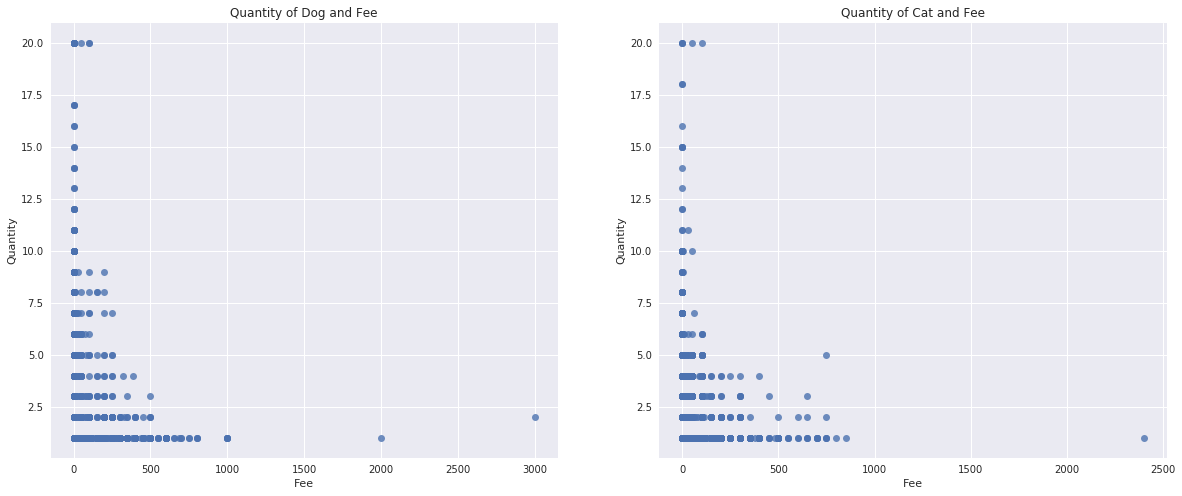

In [11]:
import seaborn as sns 
plt.figure(figsize=(20, 8));
plt.subplot(1, 2, 1)
sns.regplot(x="Fee", y="Quantity",data=df.loc[df['Type'] == 'Dog'], fit_reg=False);
plt.title('Quantity of Dog and Fee');

plt.subplot(1, 2, 2)
sns.regplot(x="Fee", y="Quantity",data=df.loc[df['Type'] == 'Cat'], fit_reg=False);
plt.title('Quantity of Cat and Fee');

plt.show()

* It is interesting that pets with high fee tend to be adopted quite fast! Maybe people prefer to pay for "better" pets: healthy, trained and so on;
* Most pets are given for free and fees are usually lower than 100 $;
* Fees for dogs tend to be higher, though these are rare cases anyway.

## Gender

In [12]:
#Adoption Speed vs Gender plot
data_gender = []
for i in range(5):
    data = df.loc[df['AdoptionSpeed'] == i]
    data_gender.append(go.Scatter(
        x = data['Gender'].value_counts().sort_index().index,
        y = data['Gender'].value_counts().sort_index().values,
        mode = str(i),
        name = str(i)))
    
layout = dict(title = 'Adoption Speed vs Gender',
              yaxis = dict(title = 'Count', zeroline = False),
              xaxis = dict(title = '1 = female, 2 = male, 3 = sprayed/neutred', zeroline = False))

fig = dict(data=data_gender, layout = layout)
py.iplot(fig, filename = 'basic-line')